# WSI LAB03 - Filip Ryniewicz


Zaimplementowałem uniwersalny rekursywny algorytm alphabeta i przetestowałem jego działanie na ConnectFour. Zbadałem wpływ głębokości przeszukiwania podawanej do algorytmu na jego skuteczność.

## Decyzje projektowe

Algorytm alphabeta przyjmuje parametry:
- node - aktualny stan gry
- głebokość przeszukiwania
- parametry a i b służące do minimalizacji czasu działania algorytmu poprzez obcinanie poddrzew
- maximizingPlayer - gracz dla którego algorytm ma znaleźć najlepszy ruch (bot)
- funkcja heurystyczna służąca do oceniania stanu gry i przypisywania mu wartości liczbowej ułatwiającej porównywanie ruchów


Funkcja heurystyczna ConnectFourHeuristic przyjmuje parametry:
- node - stan gry do oceny
- maximizingPlayer - char przestawiający gracza dla którego wywołana została funkcja


Zaimplementowana przeze mnie funkcja heurystyczna ocenia stan gry, nadając mu wartość liczbową. Punkty zdobyte przez gracza podanego przy wywołaniu są dodatnie, a dla przeciwnika - ujemne. 
Za zajęcie dwóch pól obok siebie, gracz jest nagradzany 1 punktem, a za linię o długości 3 dostaje 5 punktów, ponieważ taka konstrukcja jest dużo bliżej do zwycięstwa.
Za ułożenie linii o długości 4 (stan terminalny gry) gracz dostaje wynik nieskończoność.
Ponadto za zablokowane linie (np. pionowe 2 pola przykryte polem przeciwnika) punkty nie są przyznawane. Tak samo za linie, które nie mają szansy osiągnięcia długości 4 (np. pionowa dwójka tuż przy górnej granicy planszy) punkty nie są przyznawane.

## Porównanie działania algorytmów z różnymi depth przeciwko losowym ruchom

W celu porównania efektywności różnych depth przeprowadziłem rozgrywki między botami posługującymi się algorytmem alphaBeta a botem robiącym losowe ruchy. Oczywiście nie jest to idealny eksperyment ponieważ w dużej mierze zależy od losu, ale sądzę że uda się wyciągnąć z jego wyników sensowne wnioski.

In [5]:
from raportUtils import compareVsRandom

df = compareVsRandom([1, 2, 3, 4, 5], 1000)
df

,Wins,Draws,Losses,Win%
1,955,0,45,95.5%
2,970,0,30,97.0%
3,944,0,56,94.4%
4,915,0,85,91.5%
5,917,0,83,91.7%
Even,1885,0,115,94.2%
Odd,2816,0,184,93.9%


O dziwo najlepiej sprawdził się depth = 2. Co ciekawe, wbrew moim oczekiwaniom, większe głębokości przeszukiwań sprawywały się gorzej.
Nie do końca ufam temu wynikowi, gdyż eksperyment był losowy

## Porównywanie różnych depth poprzez przeprowadzenie rozgrywki między botami

W tym eksperymencie przeprowadzę rozgrywki między dwoma botami korzystającymi z algorytmu alphaBeta z różnymi parametrami depth. Myślę, że ten eksperyment w jednoznaczny i przejrzysty sposób przestawi wpływ parametru depth na działanie algorytmu. Jeśli jeden bot wygrywa z drugim, to jego depth jest bardziej optymalne.

In [7]:
from raportUtils import compareBotVsBot
df = compareBotVsBot([1, 2, 2, 3, 3], [2, 3, 4, 4, 5], 50)
df

,VS,Wins,Draws,Losses,Win%
1,2,43,0,57,43.0%
2,3,39,7,54,39.0%
2,4,55,7,38,55.0%
3,4,57,1,42,57.0%
3,5,54,3,43,54.0%


### Wnioski z eksperymentu:
Eksperyment przeprowadziłem w taki sposób, że w pojedynku dwóch botów, każdy tyle samo razy zaczynał grę jako pierwszy, żeby wynik eksperymentu nie zależał od tego kto zaczynał pierwszy.

Największą przepaść między bliskimi sobie głębokościami zaobserwowałem w pojedynku 2 vs 3. Również 2 sprawowało się zdecydowanie lepiej niż 1. Co ciekawe, 4 zostało pokonane przez 2 i 3, a 5 przez 3. Nie spodziewałem się takiego wyniku.

Z eksperymtu wynika, że najlepiej sprawuje się głębokość równa 3.

## Porównanie wartości ruchów znajdowanych przez algorytmy z różnymi głębokościami przeszukiwania w tych samych pozycjach

W tym eksperymencie zasymulowałem grę między botem ruszającym się zgodnie z ruchami znajdowyanymi przez algorytm alphaBeta z pierwszym przekazanym depth (w tym przypadku 2), a botem robiącym losowe ruchy. W tym samym czasie, przy każdym ruchu wywoływane są algorytmy alphaBeta z innymi podanymi depths, w celu zbadania jakie wartości mają najlepsze ruchy przez nie znajdowane. 

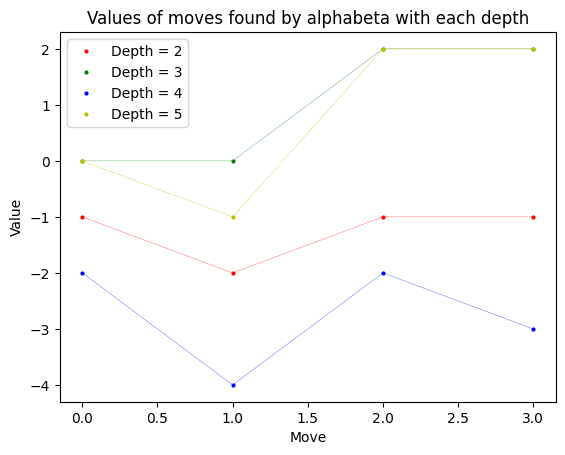

In [4]:
from raportUtils import compareDepthsOnSingleGame
compareDepthsOnSingleGame([2, 3, 4, 5])

Na wykresie przestawione są wartości najlepszych ruchów znajdowanych przez algorytmy alphaBeta z głębokościami przeszukiwania 2, 3, 4 i 5 podczas przebiegu jednej gry. Eksperyment ten pokazuje jak algorytm ocenia daną sytuację w zależności od głębokości przeszukiwania. Dla głębokości 3 i 5, algorytm w tej samej sytuacji znajdował lepsze ruchy niż dla głębokości 2 i 4. Znaczy to, że algorytm alphaBeta sprawuje się trochę lepiej z nieparzystymi głębokościami przeszukiwania.

## Wnioski końcowe i podsumowanie

Wraz ze wzrostem głębokości przeszukiwania, wykładniczo rośnie czas działania algorytmu, co znaczy, że często nie można sobie pozwolić na korzystanie z algorytmu z dużą głębokością. Wydaje mi się, że dla gry ConnectFour głębokość 3 sprawuje się bardzo dobrze i jest złotym środkiem dającym zadowalającą skuteczność przy akceptowalnie krótkim czasie działania.

Ponadto, drugi i trzeci eksperyment wskazują na to, że nieparzyste głębokości sprawują się trochę lepiej, aczkolwiek wynik pierwszego eksperymentu trochę tej tezie przeczy.

Poza tym, spodziewałem się, że im większą podam głębokość, tym algorytm będzie lepiej działał, aczkolwiek ku mojemu zdziwieniu - wcale się tak nie działo. Wydaje mi się, że może to być kwestia różnicy między alphaBeta i miniMax, ale nie przebadałem tego więc jest to tylko teoria.